# Comparing Contiguity 

### Mexico level 2 - municipalities & US counties

In [1]:
import geoplanar
import geopandas 
import numpy as np

In [2]:
mex = geopandas.read_file("../geoplanar/datasets/mexico/lvl2/mex_admbnda_adm2_govmex_20210618.shp")

In [3]:
us = geopandas.read_parquet("../geoplanar/datasets/uscounties.parquet")


In [4]:
usmex = us.append(mex)

<AxesSubplot:>

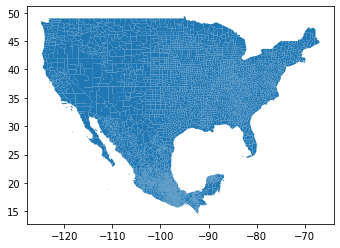

In [5]:
usmex.plot()

In [6]:
from shapely.geometry import box

clipper = geopandas.GeoDataFrame(geometry =[box(-118.2,25.44,-95.17,34.45)])

In [7]:
usmex_border = geopandas.clip(usmex, clipper)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  """Entry point for launching an IPython kernel.


<AxesSubplot:>

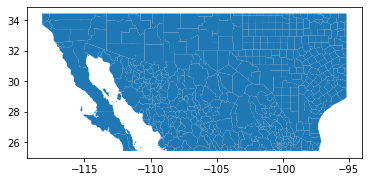

In [8]:
usmex_border.plot()

In [9]:
df = usmex_border.sort_values(["NAME", "ADM2_PCODE"], ascending = (True, True)) # sorting messy data 

In [10]:
df.reset_index(inplace=True, drop=True)

In [11]:
df.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo
0,48,001,01383786,48001,Anderson,Anderson County,06,H1,G4020,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,003,01383787,48003,Andrews,Andrews County,06,H1,G4020,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04,001,00025441,04001,Apache,Apache County,06,H1,G4020,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48,007,01383789,48007,Aransas,Aransas County,06,H1,G4020,204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,009,01383790,48009,Archer,Archer County,06,H1,G4020,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
usmex_clean = geopandas.read_parquet("../geoplanar/datasets/usmex_clean/final_usmex.parquet")

In [13]:
df2 = usmex_clean.sort_values(["NAME", "ADM2_PCODE"], ascending = (True, True)) # sorting clean data
df2.reset_index(inplace=True, drop=True) # getting rid of index to match index of messy data

In [14]:
df2.drop('index', axis=1, inplace=True)

In [15]:
df2['result'] = np.where(df["geometry"] == df2["geometry"], False, True) # checking for any changes on geometries 

In [16]:
df2['result'] 

0       True
1       True
2       True
3      False
4       True
       ...  
522    False
523     True
524     True
525    False
526    False
Name: result, Length: 527, dtype: bool

In [17]:
df2.groupby('result').size() # number of geometries equal/different bewteen the two df

result
False    105
True     422
dtype: int64

In [18]:
df.loc[74] # checking whether geometries changed in el paso (74)

STATEFP                                                      48
COUNTYFP                                                    141
COUNTYNS                                               01383855
GEOID                                                     48141
NAME                                                    El Paso
NAMELSAD                                         El Paso County
LSAD                                                         06
CLASSFP                                                      H1
MTFCC                                                     G4020
CSAFP                                                       238
CBSAFP                                                    21340
METDIVFP                                                   None
FUNCSTAT                                                      A
ALAND                                              2624297650.0
AWATER                                                5293002.0
INTPTLAT                                

In [19]:
df2.loc[74]

STATEFP                                                      48
COUNTYFP                                                    141
COUNTYNS                                               01383855
GEOID                                                     48141
NAME                                                    El Paso
NAMELSAD                                         El Paso County
LSAD                                                         06
CLASSFP                                                      H1
MTFCC                                                     G4020
CSAFP                                                       238
CBSAFP                                                    21340
METDIVFP                                                   None
FUNCSTAT                                                      A
ALAND                                              2624297650.0
AWATER                                                5293002.0
INTPTLAT                                

In [20]:
df2.loc[df2['result'] == False] # all counties/municipios that changed

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo,result
3,48,007,01383789,48007,Aransas,Aransas County,06,H1,G4020,204,...,None,None,None,None,None,None,None,None,None,False
27,48,055,01383813,48055,Caldwell,Caldwell County,06,H1,G4020,None,...,None,None,None,None,None,None,None,None,None,False
29,48,059,01383815,48059,Callahan,Callahan County,06,H1,G4020,None,...,None,None,None,None,None,None,None,None,None,False
35,48,073,01383822,48073,Cherokee,Cherokee County,06,H1,G4020,540,...,None,None,None,None,None,None,None,None,None,False
36,48,075,01383823,48075,Childress,Childress County,06,H1,G4020,None,...,None,None,None,None,None,None,None,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,None,None,None,None,None,None,None,None,None,None,...,None,None,Tamaulipas,MX28,México,MX,2020-06-23,2021-06-18,None,False
521,None,None,None,None,None,None,None,None,None,None,...,None,None,Tamaulipas,MX28,México,MX,2020-06-23,2021-06-18,None,False
522,None,None,None,None,None,None,None,None,None,None,...,None,None,Tamaulipas,MX28,México,MX,2020-06-23,2021-06-18,None,False
525,None,None,None,None,None,None,None,None,None,None,...,None,None,Tamaulipas,MX28,México,MX,2020-06-23,2021-06-18,None,False


### Checking for contiguity

In [21]:
import libpysal
from libpysal.weights import Queen, Rook
import pandas

## Rook contiguity

In [22]:
w_rook = Rook.from_dataframe(df)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [23]:
w_rook.n

527

In [24]:
w_rook.nonzero

2744

In [25]:
w_rook.pct_nonzero

0.9880134951697518

In [26]:
w_rook.neighbors[0] # location 0 has the following neighbors

[35, 116, 85, 151, 109]

In [27]:
pandas.DataFrame(*w_rook.full()).astype(int)


,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
524,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,1
525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
w_rook.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0

In [29]:
w_rook.cardinalities

{0: 5,
 1: 6,
 2: 4,
 3: 4,
 4: 5,
 5: 8,
 6: 5,
 7: 6,
 8: 5,
 9: 6,
 10: 5,
 11: 5,
 12: 5,
 13: 7,
 14: 7,
 15: 7,
 16: 6,
 17: 7,
 18: 5,
 19: 5,
 20: 4,
 21: 4,
 22: 7,
 23: 7,
 24: 7,
 25: 5,
 26: 7,
 27: 6,
 28: 5,
 29: 6,
 30: 2,
 31: 6,
 32: 4,
 33: 5,
 34: 6,
 35: 4,
 36: 3,
 37: 5,
 38: 6,
 39: 2,
 40: 5,
 41: 5,
 42: 2,
 43: 5,
 44: 6,
 45: 6,
 46: 5,
 47: 5,
 48: 5,
 49: 2,
 50: 5,
 51: 5,
 52: 5,
 53: 6,
 54: 6,
 55: 5,
 56: 9,
 57: 4,
 58: 5,
 59: 3,
 60: 6,
 61: 5,
 62: 4,
 63: 5,
 64: 6,
 65: 6,
 66: 4,
 67: 5,
 68: 4,
 69: 6,
 70: 7,
 71: 6,
 72: 6,
 73: 7,
 74: 3,
 75: 7,
 76: 7,
 77: 5,
 78: 6,
 79: 8,
 80: 5,
 81: 5,
 82: 6,
 83: 5,
 84: 4,
 85: 5,
 86: 5,
 87: 6,
 88: 2,
 89: 5,
 90: 6,
 91: 6,
 92: 5,
 93: 5,
 94: 7,
 95: 7,
 96: 5,
 97: 7,
 98: 6,
 99: 6,
 100: 3,
 101: 6,
 102: 5,
 103: 4,
 104: 6,
 105: 5,
 106: 5,
 107: 5,
 108: 5,
 109: 8,
 110: 4,
 111: 5,
 112: 6,
 113: 4,
 114: 5,
 115: 5,
 116: 6,
 117: 5,
 118: 4,
 119: 8,
 120: 4,
 121: 4,
 122: 7,
 12

In [30]:
w_rook.histogram

[(1, 5),
 (2, 28),
 (3, 43),
 (4, 92),
 (5, 136),
 (6, 125),
 (7, 52),
 (8, 28),
 (9, 14),
 (10, 3),
 (11, 0),
 (12, 1)]

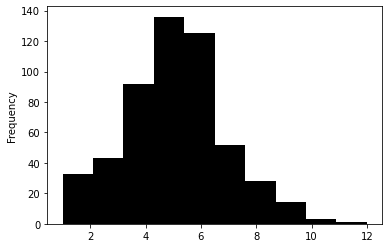

In [31]:
pandas.Series(w_rook.cardinalities).plot.hist(color='k');

In [32]:
w_rook.s0


2744.0

## Queen contiguity

In [33]:
w_queen = Queen.from_dataframe(df)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [34]:
w_queen.n

527

In [35]:
w_queen.n == w_rook.n

True

In [36]:
w_queen.nonzero

2850

In [37]:
w_queen.pct_nonzero

1.0261801972426359

In [38]:
w_queen.neighbors[0]

[35, 116, 85, 151, 109]

In [39]:
pandas.DataFrame(*w_queen.full()).astype(int)


,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
524,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,1
525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
w_queen.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 27: [1.0, 

In [41]:
w_queen.cardinalities

{0: 5,
 1: 6,
 2: 4,
 3: 4,
 4: 7,
 5: 8,
 6: 5,
 7: 6,
 8: 6,
 9: 6,
 10: 5,
 11: 8,
 12: 5,
 13: 7,
 14: 7,
 15: 7,
 16: 7,
 17: 7,
 18: 5,
 19: 6,
 20: 4,
 21: 4,
 22: 7,
 23: 7,
 24: 7,
 25: 5,
 26: 7,
 27: 6,
 28: 5,
 29: 6,
 30: 2,
 31: 6,
 32: 4,
 33: 5,
 34: 6,
 35: 4,
 36: 3,
 37: 5,
 38: 6,
 39: 2,
 40: 5,
 41: 7,
 42: 2,
 43: 5,
 44: 6,
 45: 6,
 46: 5,
 47: 5,
 48: 5,
 49: 2,
 50: 6,
 51: 5,
 52: 5,
 53: 7,
 54: 6,
 55: 5,
 56: 9,
 57: 8,
 58: 5,
 59: 3,
 60: 6,
 61: 6,
 62: 4,
 63: 5,
 64: 6,
 65: 6,
 66: 8,
 67: 5,
 68: 4,
 69: 7,
 70: 7,
 71: 6,
 72: 6,
 73: 7,
 74: 3,
 75: 7,
 76: 7,
 77: 5,
 78: 6,
 79: 8,
 80: 7,
 81: 7,
 82: 6,
 83: 5,
 84: 4,
 85: 5,
 86: 6,
 87: 6,
 88: 2,
 89: 7,
 90: 6,
 91: 6,
 92: 6,
 93: 5,
 94: 7,
 95: 7,
 96: 5,
 97: 7,
 98: 6,
 99: 6,
 100: 3,
 101: 6,
 102: 7,
 103: 4,
 104: 6,
 105: 5,
 106: 5,
 107: 7,
 108: 5,
 109: 8,
 110: 4,
 111: 5,
 112: 6,
 113: 8,
 114: 5,
 115: 5,
 116: 6,
 117: 6,
 118: 5,
 119: 8,
 120: 4,
 121: 4,
 122: 7,
 12

In [42]:
w_queen.histogram

[(1, 5),
 (2, 26),
 (3, 44),
 (4, 80),
 (5, 105),
 (6, 132),
 (7, 81),
 (8, 35),
 (9, 15),
 (10, 3),
 (11, 0),
 (12, 1)]

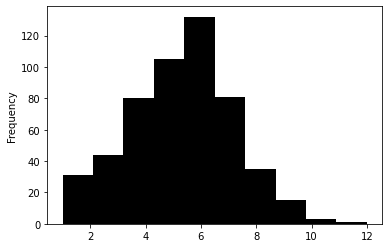

In [43]:
pandas.Series(w_queen.cardinalities).plot.hist(color='k');

In [44]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Contiguity with clean us/mex border file

## Rook contiguity

In [45]:
wr = Rook.from_dataframe(df2)

In [46]:
wr.n

527

In [47]:
wr.nonzero

2898

In [48]:
wr.pct_nonzero

1.0434632321435644

In [49]:
wr.neighbors[0] # location 0 has the following neighbors

[35, 116, 85, 151, 109]

In [50]:
pandas.DataFrame(*wr.full()).astype(int)


,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
524,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,1
525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
wr.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],

In [52]:
wr.cardinalities

{0: 5,
 1: 6,
 2: 4,
 3: 4,
 4: 5,
 5: 8,
 6: 5,
 7: 6,
 8: 5,
 9: 6,
 10: 5,
 11: 5,
 12: 5,
 13: 7,
 14: 7,
 15: 7,
 16: 6,
 17: 7,
 18: 5,
 19: 5,
 20: 7,
 21: 4,
 22: 7,
 23: 7,
 24: 7,
 25: 5,
 26: 7,
 27: 6,
 28: 5,
 29: 6,
 30: 3,
 31: 6,
 32: 4,
 33: 5,
 34: 6,
 35: 4,
 36: 3,
 37: 5,
 38: 6,
 39: 2,
 40: 9,
 41: 5,
 42: 2,
 43: 5,
 44: 6,
 45: 6,
 46: 5,
 47: 5,
 48: 5,
 49: 2,
 50: 5,
 51: 5,
 52: 5,
 53: 6,
 54: 6,
 55: 5,
 56: 9,
 57: 4,
 58: 5,
 59: 3,
 60: 6,
 61: 5,
 62: 4,
 63: 5,
 64: 6,
 65: 6,
 66: 4,
 67: 5,
 68: 6,
 69: 6,
 70: 7,
 71: 6,
 72: 6,
 73: 7,
 74: 6,
 75: 7,
 76: 7,
 77: 5,
 78: 6,
 79: 8,
 80: 5,
 81: 5,
 82: 6,
 83: 5,
 84: 4,
 85: 5,
 86: 5,
 87: 6,
 88: 2,
 89: 5,
 90: 6,
 91: 6,
 92: 5,
 93: 5,
 94: 7,
 95: 7,
 96: 5,
 97: 7,
 98: 6,
 99: 6,
 100: 6,
 101: 3,
 102: 5,
 103: 4,
 104: 6,
 105: 5,
 106: 5,
 107: 5,
 108: 5,
 109: 8,
 110: 10,
 111: 7,
 112: 6,
 113: 4,
 114: 5,
 115: 5,
 116: 6,
 117: 5,
 118: 7,
 119: 8,
 120: 6,
 121: 4,
 122: 7,
 1

In [53]:
wr.histogram

[(1, 3),
 (2, 18),
 (3, 36),
 (4, 82),
 (5, 138),
 (6, 128),
 (7, 63),
 (8, 33),
 (9, 18),
 (10, 4),
 (11, 1),
 (12, 1),
 (13, 0),
 (14, 1),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 1)]

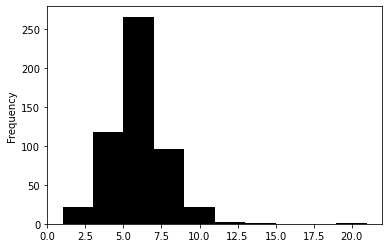

In [54]:
pandas.Series(wr.cardinalities).plot.hist(color='k');

## Queen contigutiy

In [55]:
wq = Queen.from_dataframe(df2)

In [56]:
wq.n

527

In [57]:
wq.nonzero

3002

In [58]:
wq.pct_nonzero

1.080909807762243

In [59]:
wq.neighbors[0] # location 0 has the following neighbors

[35, 116, 85, 151, 109]

In [60]:
pandas.DataFrame(*wq.full()).astype(int)


,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
524,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,1
525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
wq.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

In [62]:
wq.cardinalities

{0: 5,
 1: 6,
 2: 4,
 3: 4,
 4: 7,
 5: 8,
 6: 5,
 7: 6,
 8: 6,
 9: 6,
 10: 5,
 11: 8,
 12: 5,
 13: 7,
 14: 7,
 15: 7,
 16: 7,
 17: 7,
 18: 5,
 19: 6,
 20: 7,
 21: 4,
 22: 7,
 23: 7,
 24: 7,
 25: 5,
 26: 7,
 27: 6,
 28: 5,
 29: 6,
 30: 3,
 31: 6,
 32: 4,
 33: 5,
 34: 6,
 35: 4,
 36: 3,
 37: 5,
 38: 6,
 39: 2,
 40: 9,
 41: 7,
 42: 2,
 43: 5,
 44: 6,
 45: 6,
 46: 5,
 47: 5,
 48: 5,
 49: 2,
 50: 6,
 51: 5,
 52: 5,
 53: 7,
 54: 6,
 55: 5,
 56: 9,
 57: 8,
 58: 5,
 59: 3,
 60: 6,
 61: 6,
 62: 4,
 63: 5,
 64: 6,
 65: 6,
 66: 8,
 67: 5,
 68: 6,
 69: 7,
 70: 7,
 71: 6,
 72: 6,
 73: 7,
 74: 6,
 75: 7,
 76: 7,
 77: 5,
 78: 6,
 79: 8,
 80: 7,
 81: 7,
 82: 6,
 83: 5,
 84: 4,
 85: 5,
 86: 6,
 87: 6,
 88: 2,
 89: 7,
 90: 6,
 91: 6,
 92: 6,
 93: 5,
 94: 7,
 95: 7,
 96: 5,
 97: 7,
 98: 6,
 99: 6,
 100: 6,
 101: 3,
 102: 7,
 103: 4,
 104: 6,
 105: 5,
 106: 5,
 107: 7,
 108: 5,
 109: 8,
 110: 10,
 111: 7,
 112: 6,
 113: 8,
 114: 5,
 115: 5,
 116: 6,
 117: 6,
 118: 7,
 119: 8,
 120: 6,
 121: 4,
 122: 7,
 1

In [63]:
wq.histogram

[(1, 3),
 (2, 18),
 (3, 35),
 (4, 72),
 (5, 104),
 (6, 137),
 (7, 91),
 (8, 40),
 (9, 18),
 (10, 5),
 (11, 0),
 (12, 2),
 (13, 0),
 (14, 1),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 1)]

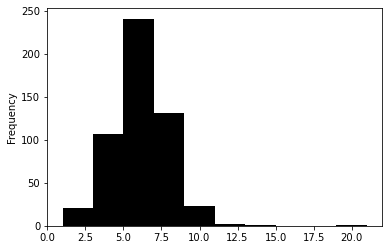

In [64]:
pandas.Series(wq.cardinalities).plot.hist(color='k');